# **Libraries**

In [1]:
%%capture

!pip install shap
!pip install optuna
!pip install kaleido

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.impute import KNNImputer

# **Functions**

The 'functions_pred_cruzada' file contains the functions that will be used to select, pre-process and train and validate the machine learning models.

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1uVoArwRTJmvbyFLyFniwFvWGHMfiNIWO --quiet

from functions_pred_cruzada import *

# **Data**

In [3]:
# Raw data containing all types of cancer
!gdown 1AaEC5jTcInC2fwbVG7BW3BeJfXq5OBlO --quiet

# Load the dataset into a DataFrame
df_geral = pd.read_csv('pacigeral_12_23.csv')

# Print the dataset shape (number of rows and columns)
print(df_geral.shape)

# Display the first three rows of the dataset
df_geral.head(3)

<ipython-input-3-cde1b7eae6a6>:5: DtypeWarning: Columns (23,24,25,32,36,37,73,74,75,78,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geral = pd.read_csv('pacigeral_12_23.csv')


(1178688, 100)


,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,4,17,2,SP,SP,3538709,PIRACICABA,9,2011-06-21,24,...,NaN,NaN,3538709,80003,NEOPLASIA MALIGNA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Piracicaba
1,9,1,2,SP,SP,3535507,PARAGUACU PAULISTA,9,2005-02-25,3,...,NaN,NaN,3506003,80003,NEOPLASIA MALIGNA,14,Inativo,6,5,Bauru
2,9,18,2,SP,SP,3548500,SANTOS,9,2012-05-14,24,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos


**Oral Cavity (C00, C01, C02, C03, C04, C05, C06)**

In [ ]:
# Oral Cavity cancer - C00, C01, C02, C03, C04, C05, C06
boca = ['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06']

# Prepare the dataset for oral cavity cancer cases
df_boca = data_prep(df_geral, boca)

# Print the dataset shape (number of rows and columns)
print(df_boca.shape)

# Display the first three rows of the dataset
df_boca.head(3)

(25531, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30515,55,1,3518701,9,2,C049,C04,IVA,C,0,...,0,2008,04,7,3518701,1,11,3.0,1,0
30517,62,1,3518701,9,1,C060,C06,IVB,C,0,...,1,2008,04,7,3518701,1,171,2.0,1,0
30555,54,1,3518701,2,1,C019,C01,IVC,E,0,...,0,2008,04,7,3518701,1,249,2.0,1,0


In [ ]:
# Generate labels for the oral cavity cancer dataset
df_boca = get_labels(df_boca)

# Print the updated dataset shape (number of rows and columns)
df_boca.shape

(25531, 32)

**Oropharynx (C10)**

In [ ]:
# Oropharynx cancer - C10
oro = ['C10']

# Prepare the dataset for oropharynx cancer cases
df_oro = data_prep(df_geral, oro)

# Print the dataset shape (number of rows and columns)
print(df_oro.shape)

# Display the first three rows of the dataset
df_oro.head(3)

(5166, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30583,71,1,3518701,9,1,C109,C10,III,E,0,...,0,2009,04,7,3518701,1,147,3.0,1,0
30589,64,1,3518701,9,1,C100,C10,IVA,E,0,...,0,2009,04,7,3518701,1,275,3.0,1,0
30924,60,1,3518701,9,2,C100,C10,III,C,0,...,0,2012,04,7,3518701,1,53,2.0,1,0


In [ ]:
# Generate labels for the oropharynx cancer dataset
df_oro = get_labels(df_oro)

# Print the updated dataset shape (number of rows and columns)
df_oro.shape

(5166, 32)

**Esophagus (C15)**

In [ ]:
# Esophagus cancer - C15
eso = ['C15']

# Prepare the dataset for esophagus cancer cases
df_eso = data_prep(df_geral, eso)

# Print the dataset shape (number of rows and columns)
print(df_eso.shape)

# Display the first three rows of the dataset
df_eso.head(3)

(14476, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30588,53,2,3518701,2,1,C151,C15,IVA,E,0,...,0,2009,04,7,3518701,1,30,3.0,1,0
30619,59,2,3518701,9,1,C154,C15,IIB,G,0,...,1,2009,04,7,3518701,1,226,2.0,1,0
30665,57,1,3518701,9,1,C154,C15,III,F,0,...,1,2009,04,7,3518701,1,475,2.0,1,0


In [ ]:
# Generate labels for the esophagus cancer dataset
df_eso = get_labels(df_eso)

# Print the updated dataset shape (number of rows and columns)
df_eso.shape

(14476, 32)

**Stomach (C16)**

In [ ]:
# Stomach cancer - C16
esto = ['C16']

# Prepare the dataset for stomach cancer cases
df_esto = data_prep(df_geral, esto)

# Print the dataset shape (number of rows and columns)
print(df_esto.shape)

# Display the first three rows of the dataset
df_esto.head(3)

(29219, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30503,59,2,3518701,9,1,C162,C16,IA,E,0,...,0,2008,04,7,3518701,1,3641,4.0,1,0
30512,61,2,3518701,9,1,C163,C16,IB,E,0,...,0,2008,04,7,3518701,1,1074,3.0,1,0
30522,70,2,3518701,9,1,C162,C16,IV,E,0,...,0,2008,04,7,3518701,1,84,3.0,1,0


In [ ]:
# Generate labels for the stomach cancer dataset
df_esto = get_labels(df_esto)

# Print the updated dataset shape (number of rows and columns)
df_esto.shape

(29219, 32)

**Small Intestine (C17)**

In [ ]:
# Small Intestine cancer - C17
delg = ['C17']

# Prepare the dataset for small intestine cancer cases
df_delg = data_prep(df_geral, delg)

# Print the dataset shape (number of rows and columns)
print(df_delg.shape)

# Display the first three rows of the dataset
df_delg.head(3)

(1792, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
32080,53,2,3546009,9,2,C171,C17,II,C,0,...,0,2006,17,17,3524402,1,3754,3.0,0,0
32677,65,2,3546009,9,2,C170,C17,I,E,0,...,0,2010,17,17,3524402,1,642,2.0,0,0
32721,60,2,3524402,2,1,C179,C17,II,E,0,...,0,2010,17,17,3524402,1,3856,2.0,1,0


In [ ]:
# Generate labels for the small intestine cancer dataset
df_delg = get_labels(df_delg)

# Print the updated dataset shape (number of rows and columns)
df_delg.shape

(1792, 32)

**Colorectal (C18, C19, C20)**

In [ ]:
# Colorectal cancer - C18, C19, C20
colo = ['C18', 'C19', 'C20']

# Prepare the dataset for colorectal cancer cases
df_colo = data_prep(df_geral, colo)

# Print the dataset shape (number of rows and columns)
print(df_colo.shape)

# Display the first three rows of the dataset
df_colo.head(3)

(61633, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30502,79,1,3518701,9,1,C199,C19,IIIB,E,0,...,2,2007,04,7,3518701,1,870,2.0,1,0
30509,68,2,3518701,9,1,C180,C18,IIA,E,0,...,2,2008,04,7,3518701,1,1493,2.0,1,0
30521,51,2,3518701,2,1,C180,C18,IIIA,E,0,...,0,2008,04,7,3518701,1,167,3.0,1,0


In [ ]:
# Generate labels for the colorectal cancer dataset
df_colo = get_labels(df_colo)

# Print the updated dataset shape (number of rows and columns)
df_colo.shape

(61633, 32)

**Anus (C21)**

In [ ]:
# Anus cancer - C21
anus = ['C21']

# Prepare the dataset for anus cancer cases
df_anus = data_prep(df_geral, anus)

# Print the dataset shape (number of rows and columns)
print(df_anus.shape)

# Display the first three rows of the dataset
df_anus.head(3)

(2495, 30)


,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,TOPOGRUP,EC,TRATHOSP,NENHUM,...,DIAGTRAT,ANODIAG,DRS,RRAS,IBGEATEN,HABILIT2,ULTIDIAG,ESCOLARI_preench,IBGE_idem_IBGEATEN,presenca_rec
30568,73,2,3518701,2,1,C211,C21,IV,E,0,...,0,2008,04,7,3518701,1,8,2.0,1,0
31092,71,2,3518701,2,2,C211,C21,IIIB,C,0,...,0,2015,04,7,3518701,1,158,2.0,1,0
31296,73,1,3508504,9,2,C211,C21,IIIB,I,0,...,0,2000,17,17,3524402,1,1126,2.0,0,0


In [ ]:
# Generate labels for the anus cancer dataset
df_anus = get_labels(df_anus)

# Print the updated dataset shape (number of rows and columns)
df_anus.shape

(2495, 32)

In [ ]:
# Columns
df_boca.columns

Index(['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'TOPO', 'TOPOGRUP',
       'EC', 'TRATHOSP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
       'DRS', 'RRAS', 'IBGEATEN', 'HABILIT2', 'ESCOLARI_preench',
       'IBGE_idem_IBGEATEN', 'presenca_rec', 'obito_geral', 'sobrevida_ano1',
       'sobrevida_ano3', 'sobrevida_ano5'],
      dtype='object')

In [ ]:
# Create a list of dataframes representing different cancer types
dfs = [df_boca, df_oro, df_eso, df_esto, df_delg, df_colo, df_anus]

# Loop through each dataframe in the list
for df in dfs:
    # Filter the dataset to include only rows where either death or 3-year survival information is available
    # Then calculate the normalized value counts for the 'sobrevida_ano3' (3-year survival) column,
    # and sort the result by the index (which corresponds to the possible survival categories).
    print(df[~((df.obito_geral == 0) & (df.sobrevida_ano3 == 0))].sobrevida_ano3.value_counts(normalize=True).sort_index())

0    0.5906
1    0.4094
Name: sobrevida_ano3, dtype: float64
0    0.740756
1    0.259244
Name: sobrevida_ano3, dtype: float64
0    0.865697
1    0.134303
Name: sobrevida_ano3, dtype: float64
0    0.727656
1    0.272344
Name: sobrevida_ano3, dtype: float64
0    0.553952
1    0.446048
Name: sobrevida_ano3, dtype: float64
0    0.447185
1    0.552815
Name: sobrevida_ano3, dtype: float64
0    0.45826
1    0.54174
Name: sobrevida_ano3, dtype: float64


Saving datasets

In [ ]:
# List of cancer codes for different anatomical regions
todos = ['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06',  # Oral Cavity
         'C10',                                            # Oropharynx
         'C15',                                            # Esophagus
         'C16',                                            # Stomach
         'C17',                                            # Small Intestine
         'C18', 'C19', 'C20',                              # Colorectal
         'C21']                                            # Anus

# Concatenate data from different cancer types into a single dataframe (df_todos)
df_todos = pd.concat([df_boca, df_oro, df_eso, df_esto, df_delg, df_colo,
                      df_anus], ignore_index=True)

# Print the shape of the resulting dataframe (number of rows and columns)
df_todos.shape


(140312, 32)

In [ ]:
# Save the combined dataset to a CSV file in the specified directory
# The file is encoded in UTF-8 and does not include the index column

# df_todos.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Predição cruzada/Datasets/sist_digestorio.csv',
#                 encoding='utf-8', index=False)

## **Information**

In [4]:
def data_prep_v2(df, topogrup):
    """
    Prepares and preprocesses a dataset for cancer survival analysis, filtering and calculating time intervals
    between key medical events and creating survival-related labels.

    Args:
    df (DataFrame): A pandas DataFrame containing cancer patient data, including columns for cancer type,
                    age, diagnosis, treatment, and other clinical information.
    topogrup (list): A list of selected cancer types (TOPOGRUP codes) to filter the dataset.

    Returns:
    DataFrame: A pandas DataFrame containing the preprocessed data, with additional columns for survival information
               such as time intervals between key medical events and labels for general mortality and 3-year survival.

    """
    df_aux = df.copy()

    # Filter by TOPOGRUP (selected cancer types)
    df_aux = df_aux[df_aux.TOPOGRUP.isin(topogrup)]

    # Exclude patients younger than 19 years old
    df_aux = df_aux[df_aux.IDADE > 19]

    # Include only residents of the state of São Paulo (SP)
    df_aux = df_aux[df_aux.UFRESID == 'SP']

    # Exclude patients with ECGRUP values of 0, X, and Y
    df_aux = df_aux[~df_aux.ECGRUP.isin(['0', 'X', 'Y'])]

    # Include only diagnoses made before 2020 and in 5-year intervals
    df_aux = df_aux[df_aux.ANODIAG < 2020]

    # Include only cases with microscopic confirmation
    df_aux = df_aux[df_aux.BASEDIAG == 3]

    # Convert selected columns to datetime format
    list_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO']
    for col_data in list_datas:
        df_aux[col_data] = pd.to_datetime(df_aux[col_data])

    # Compute time intervals between key medical events (in days)
    df_aux['CONSDIAG'] = (df_aux.DTDIAG - df_aux.DTCONSULT).dt.days  # Consultation to diagnosis
    df_aux['DIAGTRAT'] = (df_aux.DTTRAT - df_aux.DTDIAG).dt.days  # Diagnosis to treatment
    df_aux['TRATCONS'] = (df_aux.DTTRAT - df_aux.DTCONSULT).dt.days  # Consultation to treatment
    df_aux['ULTIDIAG'] = (df_aux.DTULTINFO - df_aux.DTDIAG).dt.days  # Last info to diagnosis
    df_aux['ULTITRAT'] = (df_aux.DTULTINFO - df_aux.DTTRAT).dt.days  # Last info to treatment

    print(df_aux.shape)  # Print dataset shape after preprocessing

    # Create survival-related labels
    df_aux['obito_geral'] = 0  # General mortality indicator
    df_aux['sobrevida_ano3'] = 0  # Survival beyond 3 years indicator

    # Mark patients with more than 2 years of follow-up as deceased
    df_aux.loc[df_aux.ULTINFO > 2, 'obito_geral'] = 1

    # Mark patients with more than 3 years of survival since diagnosis
    df_aux.loc[df_aux.ULTIDIAG > 3 * 365, 'sobrevida_ano3'] = 1

    # Filter dataset to include only cases where either death or 3-year survival is known
    df_aux_3anos = df_aux[~((df_aux.obito_geral == 0) & (df_aux.sobrevida_ano3 == 0))]

    return df_aux_3anos  # Return preprocessed dataset with survival information

In [5]:
# Define cancer types based on their respective topographic codes (C00-C21)
boca = ['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06']  # Oral Cavity cancer
oro = ['C10']  # Oropharyngeal cancer
eso = ['C15']  # Esophagus cancer
esto = ['C16']  # Stomach cancer
delg = ['C17']  # Small intestine cancer
colo = ['C18', 'C19', 'C20']  # Colorectal cancer
anus = ['C21']  # Anus cancer

# Apply data preparation function (data_prep_v2) for each cancer type
df_boca = data_prep_v2(df_geral, boca)  # Preprocess data for oral cavity cancer
df_oro = data_prep_v2(df_geral, oro)    # Preprocess data for oropharyngeal cancer
df_eso = data_prep_v2(df_geral, eso)    # Preprocess data for esophagus cancer
df_esto = data_prep_v2(df_geral, esto)  # Preprocess data for stomach cancer
df_delg = data_prep_v2(df_geral, delg)  # Preprocess data for small intestine cancer
df_colo = data_prep_v2(df_geral, colo)  # Preprocess data for colorectal cancer
df_anus = data_prep_v2(df_geral, anus)  # Preprocess data for anus cancer

(25531, 102)
(5166, 102)
(14476, 102)
(29219, 102)
(1792, 102)
(61633, 102)
(2495, 102)


In [7]:
# Get unique clinical staging values sorted in ascending order
grup_ec = np.sort(df_boca.ECGRUP.unique())

# Create a grouped bar chart with percentages for each cancer type
fig = go.Figure(data=[
    go.Bar(name='Oral Cavity', x=grup_ec, y=df_boca.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_boca.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Oropharinx', x=grup_ec, y=df_oro.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_oro.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Esophagus', x=grup_ec, y=df_eso.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_eso.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Stomach', x=grup_ec, y=df_esto.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_esto.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Small Intest.', x=grup_ec, y=df_delg.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_delg.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Colorectal', x=grup_ec, y=df_colo.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_colo.ECGRUP.value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Anus', x=grup_ec, y=df_anus.ECGRUP.value_counts(normalize=True).sort_index()*100,
           text=df_anus.ECGRUP.value_counts(normalize=True).sort_index()*100)
])
# Configure the layout of the chart
fig.update_layout(barmode='group',  # Grouped bar mode
                  yaxis_title='Patients (%)',  # Y-axis label
                  xaxis_title='Clinical Staging',  # X-axis label
                  legend=dict(
                      yanchor="top", y=0.99, xanchor="left", x=0.01, font=dict(size=10)  # Configure legend position
                      ),
                  margin=dict(l=10, r=10, b=10, t=10, pad=4)  # Adjust margins
                  )
# Customize text labels on bars
fig.update_traces(
    texttemplate='%{text:.1f}',  # Format text labels with one decimal place
    textposition='outside',  # Position text labels outside bars
    textfont_size=10,  # Set text font size
    textangle=-90  # Rotate text labels vertically
)

# Save the chart as an SVG file
fig.write_image('digest_estad.svg', format='svg')

# Display the chart
fig.show()

In [8]:
def plot_survs(list_dfs):
    """
    Function to plot survival curves for different types of cancer.

    Parameters:
    list_dfs (list of DataFrames): List containing dataframes for different cancer types.

    The function calculates the survival probability over time and plots it.
    """
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Define cancer type names and corresponding colors for the plot
    nomes = ['Oral Cavity', 'Oropharinx', 'Esophagus', 'Stomach', 'Small Intest', 'Colorectal', 'Anus']
    colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple']

    for i, df in enumerate(list_dfs):
        df_aux = df.copy()

        # Convert survival time from days to months
        df_aux['meses_trat'] = (df_aux['ULTITRAT']/30).round()

        # Compute cumulative survival probability
        df_aux = (df_aux.groupby(by=['meses_trat'])['obito_geral'].sum()/df_aux.shape[0]).reset_index()

        soma = 1  # Start with 100% survival
        val = df_aux['obito_geral'].values.copy()
        for j in range(df_aux.shape[0]):
            soma -= df_aux.obito_geral[j]
            val[j] = soma

        df_aux['perc'] = val  # Assign computed survival percentages
        df_aux = df_aux[df_aux.meses_trat >= 0]  # Keep only valid values

        # Plot survival curve for the specific cancer type
        plt.plot(df_aux.meses_trat[:220], df_aux.perc[:220], color=colors[i], label=nomes[i])

    # Add vertical reference lines at 12, 36, and 60 months
    plt.vlines(12, 0, 1, colors='k', linestyle='dotted', label='1 Year')
    plt.vlines(36, 0, 1, colors='k', linestyle='dotted', label='3 Years')
    plt.vlines(60, 0, 1, colors='k', linestyle='dotted', label='5 Years')

    plt.legend()  # Display legend
    plt.xlabel('Months', size=12)  # X-axis label
    plt.xticks(np.linspace(0, 220, 12))  # X-axis tick marks
    plt.yticks(np.linspace(0, 1, 11))  # Y-axis tick marks
    plt.ylabel('Survival Percentage', size=12)  # Y-axis label
    plt.ylim([0, 1.])  # Set Y-axis limits

    # Remove top and right spines for a cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()  # Display the plot

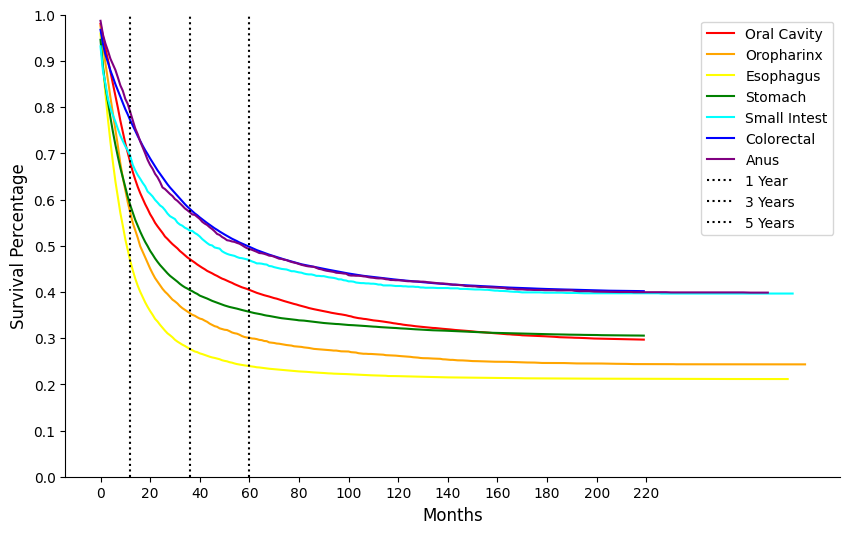

In [9]:
# Generate a plot showing the survival curves for the specified cancer types
plot_survs([df_boca, df_oro, df_eso, df_esto, df_delg, df_colo, df_anus])

In [10]:
def plotly_survs(list_dfs):
    """
    This function plots the survival curves of different cancer types using Plotly.

    Args:
    list_dfs: A list containing DataFrames with cancer data. Each DataFrame should contain survival information,
              including the treatment date and the overall death status.

    Returns:
    A Plotly figure showing the survival curves for each cancer type in the list.
    """
    fig = go.Figure()  # Create a new empty figure using Plotly

    # Loop through the provided dataframes and plot each survival curve
    for i, df in enumerate(list_dfs):

        df_aux = df.copy()  # Create a copy of the dataframe to avoid modifying the original
        nomes = ['Oral Cavity', 'Oropharinx', 'Esophagus', 'Stomach', 'Small Intest', 'Colorectal', 'Anus']  # Cancer types for labeling
        df_aux['meses_trat'] = (df_aux['ULTITRAT']/30).round()  # Convert treatment time from days to months
        df_aux = (df_aux.groupby(by=['meses_trat'])['obito_geral'].sum()/df_aux.shape[0]).reset_index()  # Calculate survival rates

        soma = 1  # Initialize the cumulative survival rate
        val = df_aux['obito_geral'].values.copy()  # Copy death status values to calculate survival rates
        # Loop through the dataframe and compute the cumulative survival
        for j in range(df_aux.shape[0]):
            soma -= df_aux.obito_geral[j]  # Subtract death cases from the survival rate
            val[j] = soma  # Store the updated survival rate

        df_aux['perc'] = val  # Store the calculated survival percentages
        df_aux = df_aux[df_aux.meses_trat >= 0]  # Filter for valid months of treatment

        # Add a trace (line) for the current cancer type
        fig.add_trace(go.Scatter(x = df_aux.meses_trat[:220],
                                 y = df_aux.perc[:220],
                                 name = nomes[i]))  # Plot the survival curve

        # Update the layout of the plot (axes and labels)
        fig.update_layout(yaxis_title='Survival Percentage',
                          xaxis_title='Months',
                          xaxis = dict(tickmode = 'linear', tick0=0, dtick=20))  # Set the tick marks for months

    # Add vertical lines to represent 1-year, 3-year, and 5-year marks
    fig.add_vline(x=12, line_dash='dot', annotation_text='1 Year',
                  annotation_position='bottom right')
    fig.add_vline(x=36, line_dash='dot', annotation_text='3 Years',
                  annotation_position='bottom right')
    fig.add_vline(x=60, line_dash='dot', annotation_text='5 Years',
                  annotation_position='bottom right')

    # Show the figure (plot)
    fig.show()

In [11]:
# Generate a plot showing the survival curves for the specified cancer types
plotly_survs([df_boca, df_oro, df_eso, df_esto, df_delg, df_colo, df_anus])